In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [29]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [28]:
!head adult.data

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [130]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'result']

In [132]:
df = pd.read_csv('adult.data', sep=', ', names = cols)

c:\users\дмитрий\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [236]:
df.shape

(32561, 15)

In [238]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [49]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [151]:
df.groupby('sex').age.mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [150]:
df[df['native_country'] == 'United-States']['native_country'].count()/df['native_country'].count()

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

Text(0, 0.5, 'Количество людей')

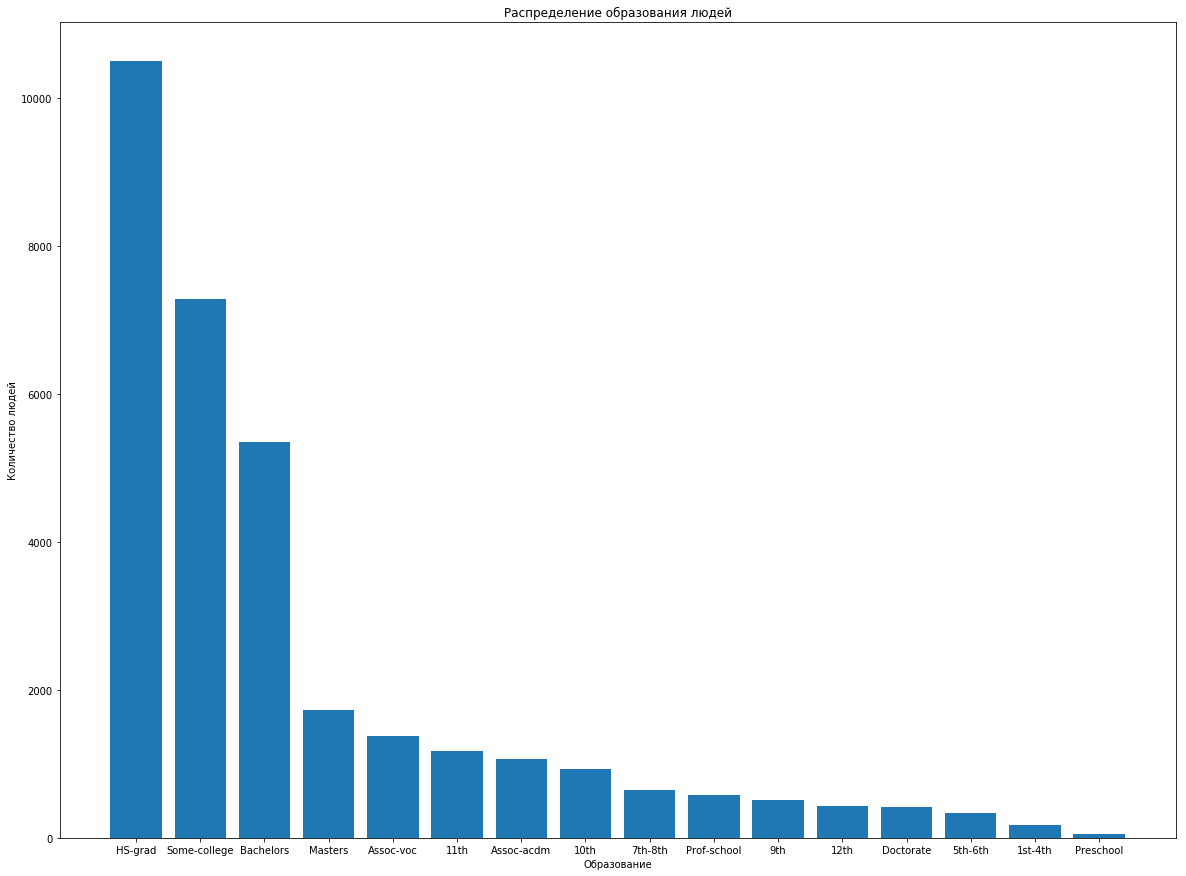

In [144]:
plt.figure(figsize=(20, 15))
plt.bar(df['education'].value_counts().index, 
           df['education'].value_counts().values, 
           tick_label=df['education'].value_counts().index)

plt.title('Распределение образования людей')
plt.xlabel('Образование')
plt.ylabel('Количество людей')

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [230]:
df[df.marital_status == 'Divorced'].fnlwgt.mean(), df[df.marital_status == 'Divorced'].fnlwgt.std()

(185802.79045689848, 105646.78945933598)

Text(0, 0.5, 'Число людей')

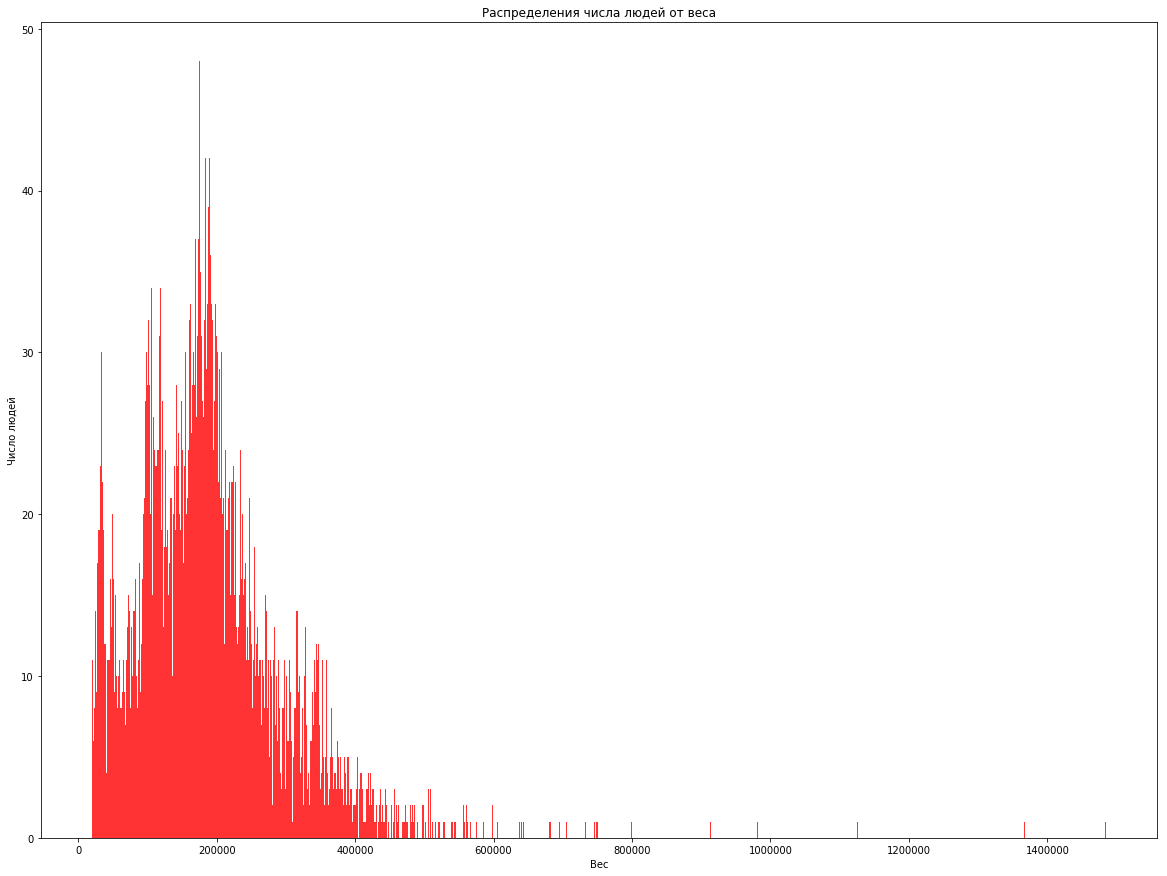

In [264]:
plt.figure(figsize=(20, 15))
divorced_people = df[df.marital_status == 'Divorced'].fnlwgt.value_counts().index.dropna()

#plt.hist(divorced_people, color='red', alpha=0.8, bins = np.logspace(0.1, 1.0, 500))
#plt.hist(divorced_people, color='red', alpha=0.8, bins = 1000)
hist, bins, _ = plt.hist(divorced_people, color='red', alpha=0.8, bins=1000)
#plt.gca().set_xscale("log")

plt.title('Распределения числа людей от веса')
plt.xlabel('Вес')
plt.ylabel('Число людей')

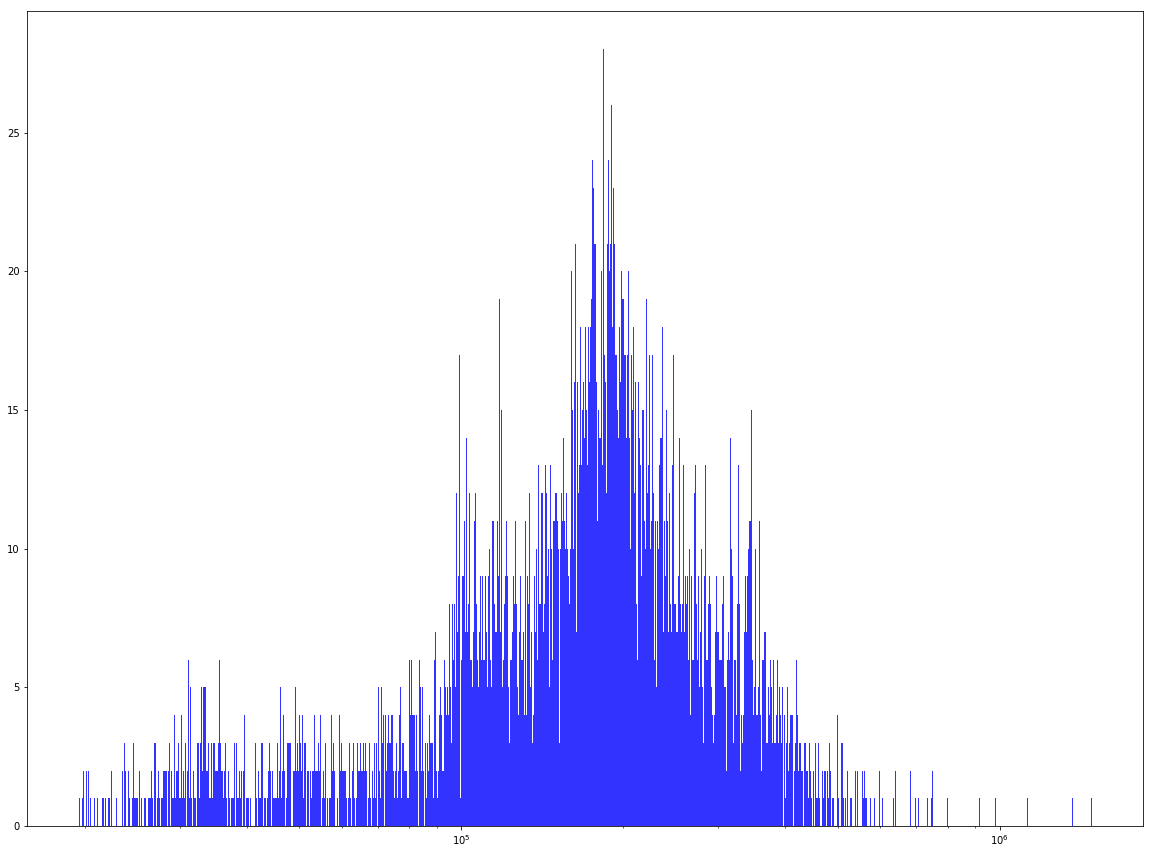

In [266]:
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.figure(figsize=(20, 15))
plt.hist(divorced_people, color='blue', alpha=0.8, bins = logbins)
plt.xscale('log')

> Ответ: оно мне напоминает логнормальное распределение

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [307]:
BMP50= df[(df.education.isin(['Masters', 'Bachelors', 'Doctorate'])) & (df.result == ">50K")].result.count()
Another = df[df.result == ">50K"].result.count()
BMP50/Another

0.4445861497258003

> Ответ: Нет. Всего 44.46%

# Сколько в среднем работают люди в неделю в зависимости от education?

In [312]:
df.groupby('education')['hours_per_week'].mean().reset_index()

,education,hours_per_week
0,10th,37.052519
1,11th,33.925957
2,12th,35.780600
3,1st-4th,38.255952
4,5th-6th,38.897898
5,7th-8th,39.366873
6,9th,38.044747
7,Assoc-acdm,40.504217
8,Assoc-voc,41.610709
9,Bachelors,42.614006


# Кто больше работает в неделю - мужчины или женщины?

In [322]:
df.groupby('sex')['hours_per_week'].mean().reset_index()

,sex,hours_per_week
0,Female,36.410361
1,Male,42.428086


In [323]:
print("Мужчины работают больше")

Мужчины работают больше


# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [331]:
in_relation = df[df.relationship.isin(['Husband', 'Wife'])]['hours_per_week'].mean()
out_relation = df[df.relationship.isin(['Not-in-family', 'Other-relative', 'Own-child', 'Unmarried'])]['hours_per_week'].mean()
in_relation/out_relation

1.1400779859239083

In [332]:
print("Те кто в отношениях работают больше")

Те кто в отношениях работают больше


# Из каких стран люди работают farmers/fishers?

In [340]:
df[df.occupation == 'Farming-fishing'].native_country.unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [352]:
print("Наибольшее количество часов -", df.hours_per_week.max())
print("Количество людей -", df.hours_per_week.value_counts()[df.hours_per_week.max()])
print("Доход меньше 50к у", df.groupby('hours_per_week').result.value_counts()[df.hours_per_week.max()]['<=50K'], "человек")
print("Доход больше 50к у", df.groupby('hours_per_week').result.value_counts()[df.hours_per_week.max()]['>50K'], "человек")

Наибольшее количество часов - 99
Количество людей - 85
Доход меньше 50к у 60 человек
Доход больше 50к у 25 человек
